In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from math import pi

In [2]:
df = pd.read_csv('data/df_iii.csv')

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df.head(5)

,Title,Album,Artist,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Icky Thump,Icky Thump,The White Stripes,67,2007,0.417,0.630,9,-7.240,1,0.0898,0.0209,0.013400,0.0543,0.341,94.214,254533,4
1,You Don't Know What Love Is (You Just Do as Yo...,Icky Thump,The White Stripes,49,2007,0.423,0.757,9,-5.646,1,0.0519,0.0280,0.000045,0.1620,0.573,83.295,234400,4
2,300 M.P.H. Torrential Outpour Blues,Icky Thump,The White Stripes,40,2007,0.539,0.435,9,-10.818,1,0.0845,0.5850,0.026100,0.1070,0.228,85.591,328560,4
3,Conquest,Icky Thump,The White Stripes,43,2007,0.473,0.759,7,-4.890,1,0.0700,0.0523,0.004940,0.1140,0.455,136.947,168307,4
4,Bone Broke,Icky Thump,The White Stripes,41,2007,0.278,0.793,1,-6.217,0,0.1430,0.1000,0.842000,0.0801,0.404,82.263,194360,4


In [5]:
df_heat = df.set_index(['Title', 'Album', 'Artist'])

In [6]:
df_heat

,,,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Title,Album,Artist,,,,,,,,,,,,,,,
Icky Thump,Icky Thump,The White Stripes,67,2007,0.417,0.630,9,-7.240,1,0.0898,0.02090,0.013400,0.0543,0.341,94.214,254533,4
You Don't Know What Love Is (You Just Do as You're Told),Icky Thump,The White Stripes,49,2007,0.423,0.757,9,-5.646,1,0.0519,0.02800,0.000045,0.1620,0.573,83.295,234400,4
300 M.P.H. Torrential Outpour Blues,Icky Thump,The White Stripes,40,2007,0.539,0.435,9,-10.818,1,0.0845,0.58500,0.026100,0.1070,0.228,85.591,328560,4
Conquest,Icky Thump,The White Stripes,43,2007,0.473,0.759,7,-4.890,1,0.0700,0.05230,0.004940,0.1140,0.455,136.947,168307,4
Bone Broke,Icky Thump,The White Stripes,41,2007,0.278,0.793,1,-6.217,0,0.1430,0.10000,0.842000,0.0801,0.404,82.263,194360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trash Tongue Talker,Blunderbuss,Jack White,37,2012,0.495,0.781,9,-10.510,1,0.0345,0.00938,0.007450,0.1070,0.699,142.266,200360,4
Hip (Eponymous) Poor Boy,Blunderbuss,Jack White,35,2012,0.406,0.866,7,-9.198,1,0.0670,0.11300,0.000058,0.1220,0.594,169.513,183480,4
I Guess I Should Go To Sleep,Blunderbuss,Jack White,33,2012,0.343,0.471,2,-11.944,1,0.0584,0.11000,0.000089,0.1050,0.294,184.051,157360,3


In [7]:
df_min_max = MinMaxScaler(feature_range=(0,10))

In [8]:
df_min_max.fit(df_heat)

MinMaxScaler(feature_range=(0, 10))

In [9]:
df_scaled = df_min_max.transform(df_heat)

In [10]:
df_music = pd.DataFrame(df_scaled, index = df_heat.index, columns=df_heat.columns)
df_music.head(5)

,,,Popularity,Date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
Title,Album,Artist,,,,,,,,,,,,,,,
Icky Thump,Icky Thump,The White Stripes,7.384615,3.478261,4.056291,5.989071,8.181818,6.570611,10.0,1.642251,0.209597,0.148394,0.005636,3.473478,2.425204,5.492373,7.5
You Don't Know What Love Is (You Just Do as You're Told),Icky Thump,The White Stripes,4.615385,3.478261,4.155629,7.377049,8.181818,7.430792,10.0,0.668209,0.280883,0.000494,1.219567,6.308971,1.643298,4.999204,7.5
300 M.P.H. Torrential Outpour Blues,Icky Thump,The White Stripes,3.230769,3.478261,6.076159,3.857923,8.181818,4.639793,10.0,1.506040,5.873392,0.289037,0.599639,2.092398,1.807714,7.305707,7.5
Conquest,Icky Thump,The White Stripes,3.692308,3.478261,4.983444,7.398907,6.363636,7.838757,10.0,1.133385,0.524865,0.054707,0.678539,4.866781,5.485299,3.380218,7.5
Bone Broke,Icky Thump,The White Stripes,3.384615,3.478261,1.754967,7.770492,0.909091,7.122659,0.0,3.009509,1.003793,9.324474,0.296438,4.243461,1.569397,4.018401,7.5


In [11]:
df_music.drop(['Popularity', 'Date'], axis=1, inplace= True)

In [12]:
df_music.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,4.560249,6.643103,5.157428,6.606559,7.268293,1.836069,2.771674,0.948045,1.520761,4.370122,4.196565,4.153708,7.121951
std,2.016551,2.286470,3.162728,1.709310,4.466786,2.062561,3.002151,2.198437,1.654830,2.210740,2.411574,1.379617,1.265979
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.112583,5.147541,1.818182,5.529653,0.000000,0.449756,0.154374,0.000669,0.504959,2.740161,2.145425,3.335146,7.500000
50%,4.437086,7.147541,6.363636,6.668286,10.000000,1.089694,1.365248,0.029014,0.825068,4.426791,4.084757,4.211426,7.500000
75%,5.877483,8.459016,8.181818,7.838757,10.000000,2.521203,4.829189,0.562569,2.188909,5.868981,5.866190,4.958370,7.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


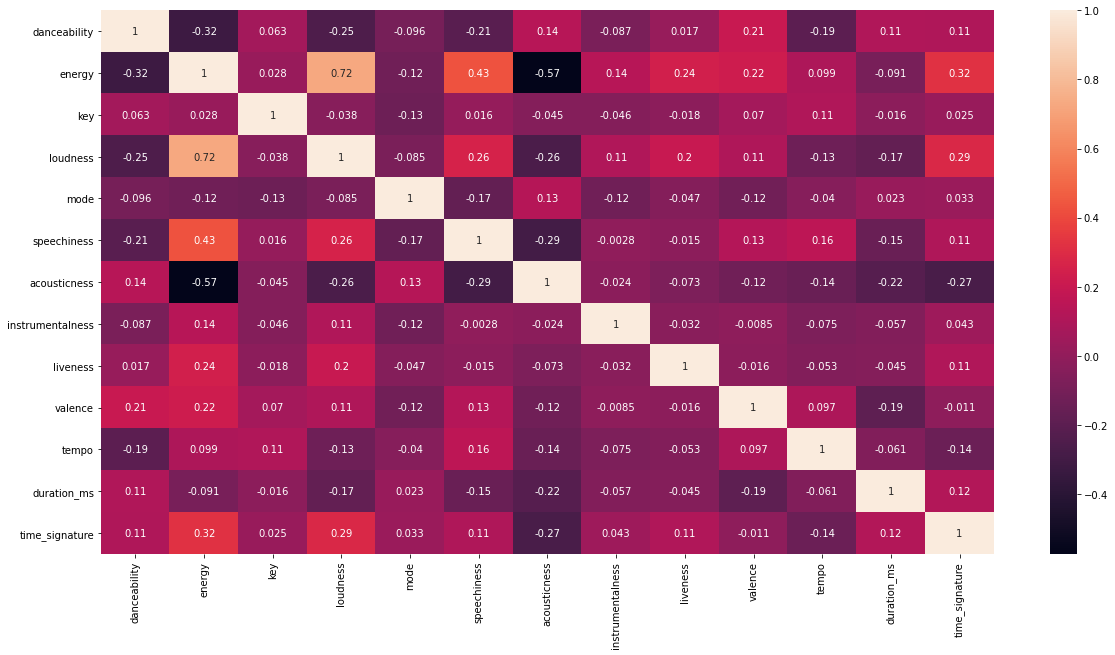

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_music.corr(),annot = True);

In [14]:
df.columns

Index(['Title', 'Album', 'Artist', 'Popularity', 'Date', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature'],
      dtype='object')

In [15]:
df_columns = df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']]
print(df_columns.columns)

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence'],
      dtype='object')


In [16]:
X = StandardScaler().fit_transform(df_columns)

In [17]:
sum_of_squared_distances = []
K = range(1,20)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X)
    sum_of_squared_distances.append(k_means.inertia_)

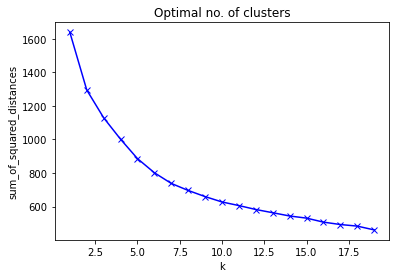

In [18]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Optimal no. of clusters')
plt.show()

In [19]:
k_means_4 = KMeans(n_clusters=4)
model = k_means_4.fit(X)
predict = k_means_4.predict(X)

In [20]:
df['compilation album nr'] = pd.Series(predict, index=df.index)

In [21]:
col = df.pop('compilation album nr')
df.insert(5, 'compilation album nr', col)
df

,Title,Album,Artist,Popularity,Date,compilation album nr,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Icky Thump,Icky Thump,The White Stripes,67,2007,0,0.417,0.630,9,-7.240,1,0.0898,0.02090,0.013400,0.0543,0.341,94.214,254533,4
1,You Don't Know What Love Is (You Just Do as Yo...,Icky Thump,The White Stripes,49,2007,0,0.423,0.757,9,-5.646,1,0.0519,0.02800,0.000045,0.1620,0.573,83.295,234400,4
2,300 M.P.H. Torrential Outpour Blues,Icky Thump,The White Stripes,40,2007,2,0.539,0.435,9,-10.818,1,0.0845,0.58500,0.026100,0.1070,0.228,85.591,328560,4
3,Conquest,Icky Thump,The White Stripes,43,2007,0,0.473,0.759,7,-4.890,1,0.0700,0.05230,0.004940,0.1140,0.455,136.947,168307,4
4,Bone Broke,Icky Thump,The White Stripes,41,2007,1,0.278,0.793,1,-6.217,0,0.1430,0.10000,0.842000,0.0801,0.404,82.263,194360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Trash Tongue Talker,Blunderbuss,Jack White,37,2012,0,0.495,0.781,9,-10.510,1,0.0345,0.00938,0.007450,0.1070,0.699,142.266,200360,4
201,Hip (Eponymous) Poor Boy,Blunderbuss,Jack White,35,2012,0,0.406,0.866,7,-9.198,1,0.0670,0.11300,0.000058,0.1220,0.594,169.513,183480,4
202,I Guess I Should Go To Sleep,Blunderbuss,Jack White,33,2012,2,0.343,0.471,2,-11.944,1,0.0584,0.11000,0.000089,0.1050,0.294,184.051,157360,3
203,On And On And On,Blunderbuss,Jack White,33,2012,1,0.419,0.350,11,-14.944,0,0.0382,0.38100,0.789000,0.1040,0.285,125.727,235853,4


In [22]:
label = k_means_4.fit_predict(X)

In [23]:
df['compilation album nr'].value_counts()

0    97
2    54
3    37
1    17
Name: compilation album nr, dtype: int64

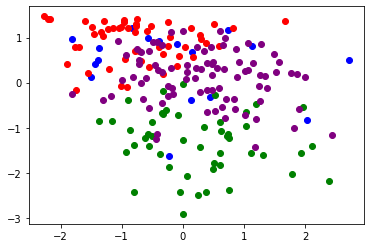

In [26]:
# Plot each of the cluster points on a scatterplot
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]
filtered_label3 = X[label == 3]

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'blue')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'red')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'purple')

plt.show()

In [27]:
df['Title'][df['compilation album nr'] == 0].unique()

array(['Icky Thump',
       "You Don't Know What Love Is (You Just Do as You're Told)",
       'Conquest', 'Prickly Thorn, But Sweetly Worn', 'Little Cream Soda',
       'Rag and Bone', "I'm Slowly Turning Into You", 'Effect and Cause',
       'My Doorbell', 'Little Ghost', 'The Denial Twist',
       'Seven Nation Army', "There's No Home For You Here",
       "I Just Don't Know What to Do With Myself", 'Ball and Biscuit',
       'Little Acorns', 'The Air Near My Fingers',
       'Dead Leaves and the Dirty Ground', 'Hotel Yorba', 'Little Room',
       'I Think I Smell a Rat', 'Now Mary',
       "You're Pretty Good Looking (For a Girl)", 'Hello Operator',
       "Truth Doesn't Make a Noise", 'Jumble, Jumble',
       "Why Can't You Be Nicer to Me?", 'Little People',
       'Die by the Drop', "I Can't Hear You", 'No Horse', 'Old Mary',
       'Buzzkill(er)', 'Let Me Through', 'Three Dollar Hat',
       'Lose The Right', 'Rough Detective', 'Open Up', 'Be Still',
       'Mile Markers', '60 F

In [28]:
df['Artist'][df['compilation album nr'] == 0].unique()

array(['The White Stripes', 'The Dead Weather', 'The Raconteurs',
       'Jack White'], dtype=object)

In [29]:
df['Title'][df['compilation album nr'] == 1].unique()

array(['Bone Broke', 'St. Andrew (This Battle Is In the Air)',
       'Catch Hell Blues', 'The Hardest Button to Button', 'Aluminum',
       "I Can't Wait", 'Little Bird', 'Death Letter',
       'Jimmy the Exploder', 'Wasting My Time', 'Cannon', 'Astro',
       'St. James Infirmary Blues', "I'm Mad", '3 Birds', 'Corporation',
       'On And On And On'], dtype=object)

In [30]:
df['Artist'][df['compilation album nr'] == 1].unique()

array(['The White Stripes', 'The Dead Weather', 'Jack White'],
      dtype=object)

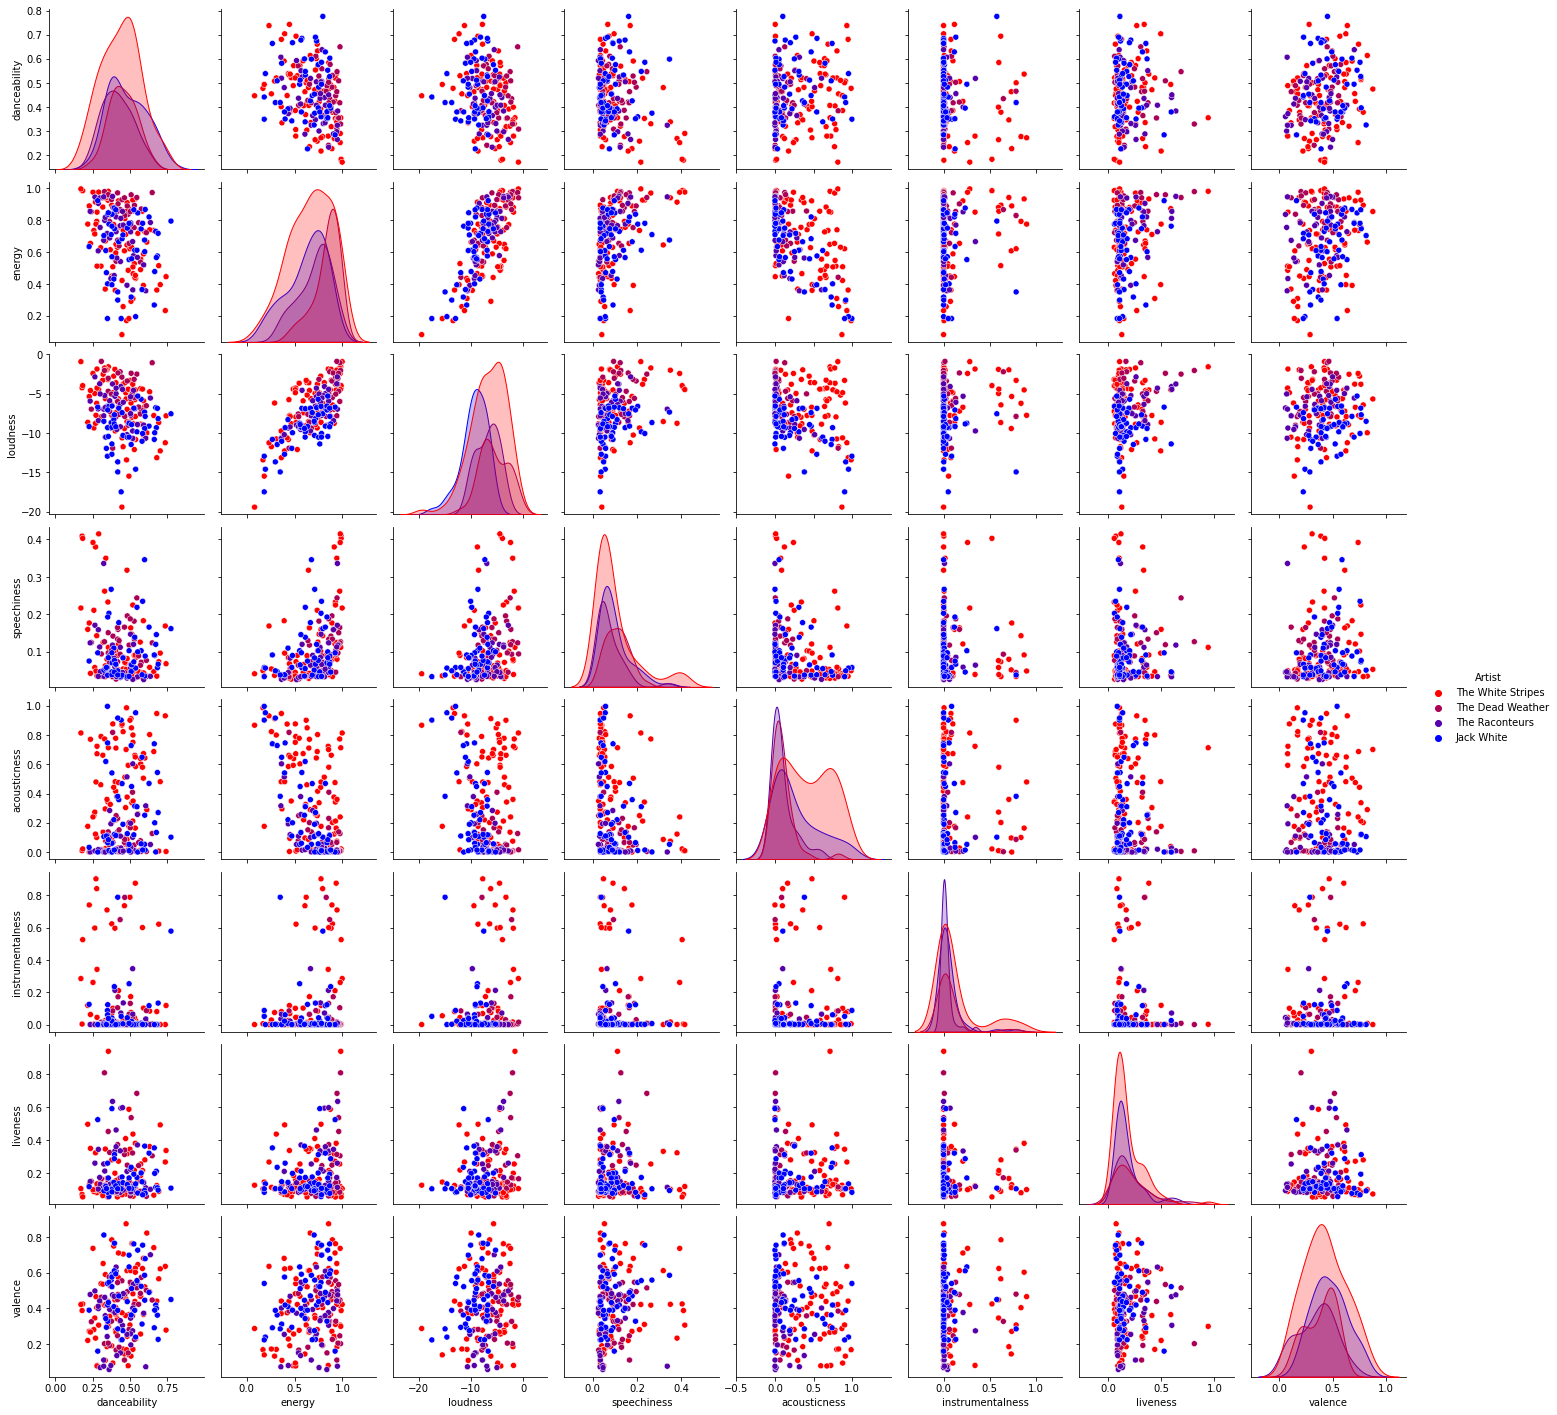

In [31]:
sns.pairplot(df, vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence'], hue='Artist', palette=sns.blend_palette(['red','blue'], 4));

In [32]:
cl_pos = pd.DataFrame(k_means_4.cluster_centers_)

In [33]:
cl_pos

,0,1,2,3,4,5,6,7
0,-0.135298,0.392527,0.421614,-0.270542,-0.044697,3.068889,-0.067786,-0.089153
1,-0.735489,0.917198,0.738720,0.662561,-0.496575,-0.222583,0.794578,-0.233428
2,0.254549,-1.325238,-0.786336,-0.642882,1.191213,-0.326156,-0.294558,-0.584159
3,0.334977,0.112235,-0.090571,0.011450,-0.363850,-0.283635,-0.308453,0.494315


In [34]:
cl_pos.columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

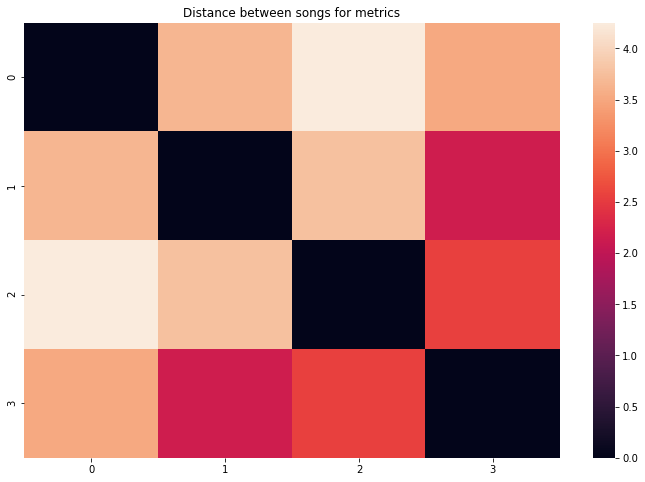

In [35]:
from sklearn.metrics import pairwise_distances

distance_df = pd.DataFrame(pairwise_distances(cl_pos), index=cl_pos.index, columns=cl_pos.index)

plt.subplots(figsize=(12,8))
sns.heatmap(distance_df)
plt.title('Distance between songs for metrics')
plt.show()

In [36]:
cl_pos

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,-0.135298,0.392527,0.421614,-0.270542,-0.044697,3.068889,-0.067786,-0.089153
1,-0.735489,0.917198,0.738720,0.662561,-0.496575,-0.222583,0.794578,-0.233428
2,0.254549,-1.325238,-0.786336,-0.642882,1.191213,-0.326156,-0.294558,-0.584159
3,0.334977,0.112235,-0.090571,0.011450,-0.363850,-0.283635,-0.308453,0.494315


In [37]:
cl_pos.reset_index().rename(columns={'index':'cluster'})

,cluster,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,0,-0.135298,0.392527,0.421614,-0.270542,-0.044697,3.068889,-0.067786,-0.089153
1,1,-0.735489,0.917198,0.738720,0.662561,-0.496575,-0.222583,0.794578,-0.233428
2,2,0.254549,-1.325238,-0.786336,-0.642882,1.191213,-0.326156,-0.294558,-0.584159
3,3,0.334977,0.112235,-0.090571,0.011450,-0.363850,-0.283635,-0.308453,0.494315


In [39]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
 
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
# print(radar_df)
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

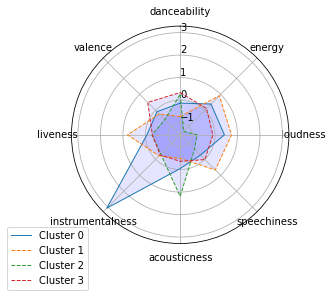

In [41]:
for i in range(0, len(radar_df.cluster) -1, 3):
    # Initialise the spider plot
    ax = plt.subplot(111,polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axes per variable + add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(ticks=None, labels=None)
    
    # Ind0
    values=radar_df.loc[i].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle=None, label=f"Cluster {i}")
    ax.fill(angles, values, 'b', alpha=0.1)

    #Ind1
    values=radar_df.loc[i+1].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="--", label=f"Cluster {i+1}")
    ax.fill(angles, values, 'b', alpha=0.1)
    
    #Ind2
    values=radar_df.loc[i+2].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="--", label=f"Cluster {i+2}")
    ax.fill(angles, values, 'b', alpha=0.1)
    
    #Ind3
    values=radar_df.loc[i+3].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="--", label=f"Cluster {i+3}")
    ax.fill(angles, values, 'b', alpha=0.1)

    # # Add legend
    plt.legend(bbox_to_anchor=(0.1, 0.1))

    # Show the graph
    plt.show()